## **11 API's requests**
- john fredy beltran cuellar
- date 08/29/2025
- goal: aprender a efectuar llamadas a API's 

In [12]:
# step 0
import os 
import requests 
import json
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv 
load_dotenv() # carga las variables de entorno desde el archivo .env

True

In [13]:
# https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m
# -12.06, -77.0375
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": -12.06,
    "longitude": -77.0375,
    "past_days": 10,
    "hourly": "temperature_2m,relative_humidity_2m,wind_speed_10m",
}
response = requests.get(url, params=params)

In [14]:
if response.status_code == 200: # si la respuesta es exitosa
    data = response.json() # convierto la respuesta a JSON
    print(f'data retrieve successfully: {data.keys()}') # imprimo las llaves del JSON
else: # si la respuesta no es exitosa
    print(f"Error: {response.status_code}") # imprimo el código de estado

data retrieve successfully: dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])


In [15]:
data  

{'latitude': -11.875,
 'longitude': -77.125,
 'generationtime_ms': 0.1195669174194336,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 143.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relative_humidity_2m': '%',
  'wind_speed_10m': 'km/h'},
 'hourly': {'time': ['2025-08-20T00:00',
   '2025-08-20T01:00',
   '2025-08-20T02:00',
   '2025-08-20T03:00',
   '2025-08-20T04:00',
   '2025-08-20T05:00',
   '2025-08-20T06:00',
   '2025-08-20T07:00',
   '2025-08-20T08:00',
   '2025-08-20T09:00',
   '2025-08-20T10:00',
   '2025-08-20T11:00',
   '2025-08-20T12:00',
   '2025-08-20T13:00',
   '2025-08-20T14:00',
   '2025-08-20T15:00',
   '2025-08-20T16:00',
   '2025-08-20T17:00',
   '2025-08-20T18:00',
   '2025-08-20T19:00',
   '2025-08-20T20:00',
   '2025-08-20T21:00',
   '2025-08-20T22:00',
   '2025-08-20T23:00',
   '2025-08-21T00:00',
   '2025-08-21T01:00',
   '2025-08-21T02:00',
   '2025-08-21T03:00',
   '2025-08-21T04:00',
   '2

In [16]:
df_weather = pd.DataFrame(data['hourly']) # crea DataFrame a partir de la respuesta de la API
df_weather["time"] = pd.to_datetime(df_weather["time"]) # convierte la columna de tiempo a datetime
df_weather = df_weather.set_index("time") # establece la columna de tiempo como índice
df_weather

,temperature_2m,relative_humidity_2m,wind_speed_10m
time,,,
2025-08-20 00:00:00,17.1,87,16.3
2025-08-20 01:00:00,17.1,86,17.1
2025-08-20 02:00:00,17.0,85,16.4
2025-08-20 03:00:00,17.1,84,13.6
2025-08-20 04:00:00,17.1,85,9.5
...,...,...,...
2025-09-05 19:00:00,16.8,90,15.0
2025-09-05 20:00:00,16.8,90,16.3
2025-09-05 21:00:00,16.8,90,17.3


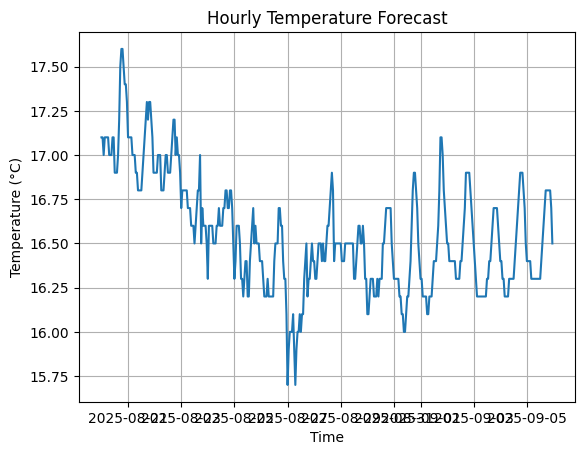

In [17]:
plt.plot(df_weather.index, df_weather["temperature_2m"])# grafico la temperatura en función del tiempo
plt.xlabel("Time")# etiqueta del eje x
plt.ylabel("Temperature (°C)")# etiqueta del eje y
plt.grid(True)# habilita la cuadrícula
plt.title("Hourly Temperature Forecast")# título del gráfico
plt.show()

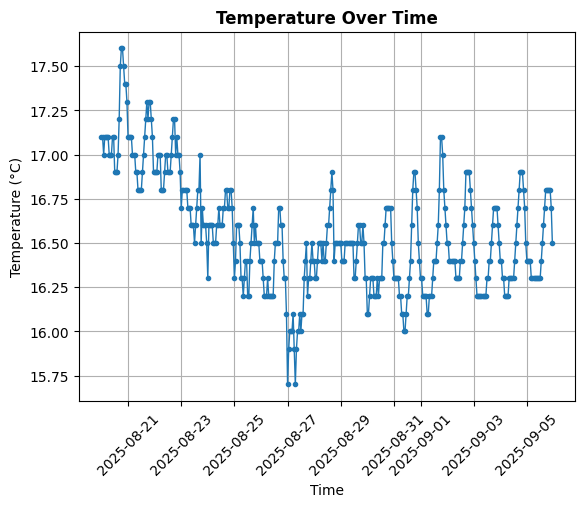

In [18]:
# cambiar para que la fecha se vea mejor
plt.plot(
    df_weather.index, df_weather["temperature_2m"],
    marker="o",linestyle="-",linewidth=1,markersize=3)# grafico la temperatura en función del tiempo
plt.xlabel("Time")# etiqueta del eje x
plt.ylabel("Temperature (°C)")# etiqueta del eje y
plt.grid(True)# habilita la cuadrícula
plt.title("Temperature Over Time", fontweight="bold")# título del gráfico
plt.xticks(rotation=45)# rota las etiquetas del eje x
plt.show()



In [33]:
# Renombrar columnas
df_weather = df_weather.rename(columns={
    "temperature_2m": "temperature_c",
    "relative_humidity_2m": "relative_humidity_pct",
    "wind_speed_10m": "wind_speed_kmh"
})
df_weather

,temperature_c,relative_humidity_pct,wind_speed_kmh
time,,,
2025-08-20 00:00:00,17.1,87,16.3
2025-08-20 01:00:00,17.1,86,17.1
2025-08-20 02:00:00,17.0,85,16.4
2025-08-20 03:00:00,17.1,84,13.6
2025-08-20 04:00:00,17.1,85,9.5
...,...,...,...
2025-09-05 19:00:00,16.8,90,15.0
2025-09-05 20:00:00,16.8,90,16.3
2025-09-05 21:00:00,16.8,90,17.3


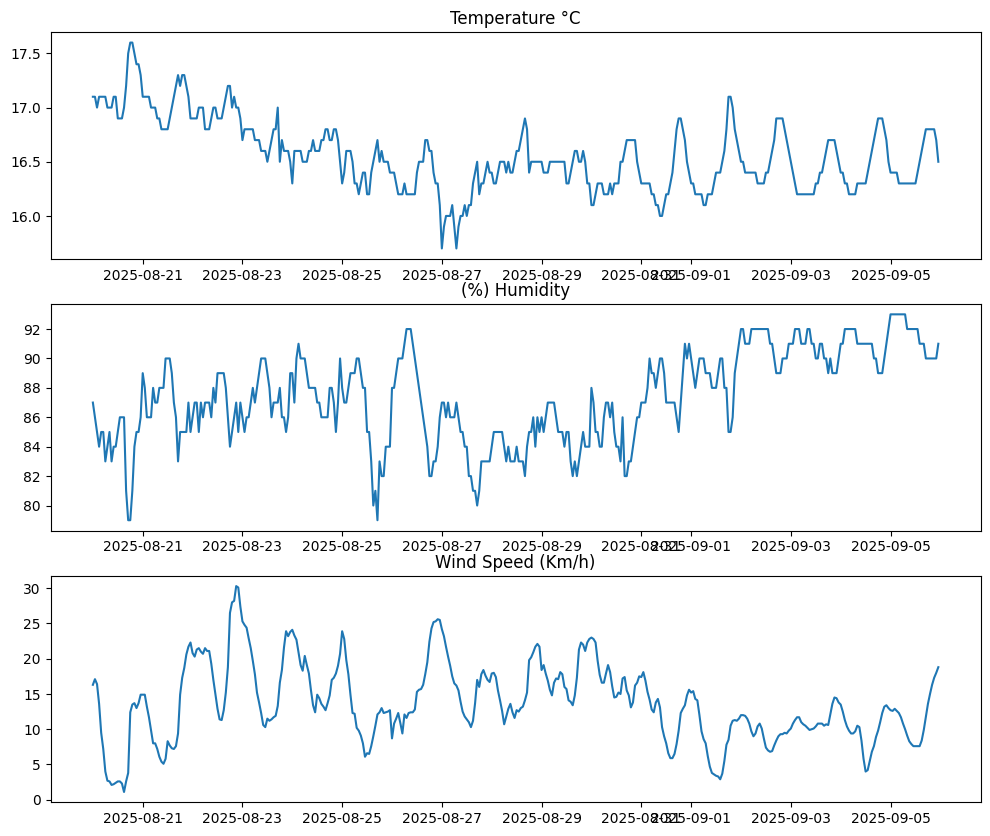

In [ ]:
fig,(ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,10))# crea una figura con 3 subplots


ax1.plot(df_weather.index, df_weather["temperature_c"])# grafico la temperatura en función del tiempo
ax1.set_title("Temperature °C")# título del gráfico

ax2.plot(df_weather.index, df_weather["relative_humidity_pct"]) # grafico la humedad en función del tiempo
ax2.set_title("(%) Humidity")

ax3.plot(df_weather.index, df_weather["wind_speed_kmh"])# grafico la velocidad del viento en función del tiempo
ax3.set_title("Wind Speed (Km/h)")

plt.show()


In [ ]:
spotify_client = os.getenv("SPOTIFY_CLIENT") # Client ID for Spotify API
spotify_secret = os.getenv("SPOTIFY_SECRET") # Client Secret for Spotify API

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


In [ ]:
sp = spotipy.Spotify(
    auth_manager=SpotifyClientCredentials(
    client_id=spotify_client, client_secret=spotify_secret
    )
    ) # crea un objeto de la clase Spotify con las credenciales

In [ ]:
results = sp.search(q="weezer", limit=20) # busca canciones de la banda weezer, limita a 20 resultados

In [ ]:
for idx, track in enumerate(results['tracks']['items']):
    print(f"{idx}: {track['name']} - {track['artists'][0]['name']}") # imprime el nombre de la canción y el artista 

0: Buddy Holly - Weezer
1: Island In The Sun - Weezer
2: My Name Is Jonas - Weezer
3: Say It Ain't So - Weezer
4: Say It Ain't So - Original Mix - Weezer
5: Pink Triangle - Weezer
6: Undone - The Sweater Song - Weezer
7: Africa - Weezer
8: I Just Threw Out The Love Of My Dreams - Weezer
9: Beverly Hills - Weezer
10: Hash Pipe - Weezer
11: Only In Dreams - Weezer
12: You Gave Your Love To Me Softly - Weezer
13: Think Fast (feat. Weezer) - Dominic Fike
14: Buddy Holly - 2024 Remaster - Weezer
15: Pork And Beans - Weezer
16: Pink Triangle - Weezer
17: Lump - The Presidents Of The United States Of America
18: My Name Is Jonas - 2024 Remaster - Weezer
19: Take on Me - Weezer
